# The tutorial

### Overview


1. Build a TB system

    1. Build a lattice
    2. Build a model
    3. Build the system
2. Compute physical properties

Intuitive user interface: we will see how general TB systems can be built using just few functions:

`sublattice()` `lattice()` `supercell()` `onsite()` `hopping()` `hamiltonian()` 

#### Load the packages

In [1]:
using Quantica

In [4]:
using GLMakie

### 1A. Lattices

In [ ]:
#lattice(sublats, ...)

In [2]:
sublat_A = sublat((0.0, -0.5/sqrt(3.0)), name = :A)
sublat_B = sublat((0.0, 0.5/sqrt(3.0)), name = :B)

Sublat{2,Float64} : sublattice of Float64-typed sites in 2D space
  Sites    : 1
  Name     : :B

In [13]:
lat = lattice(sublat_A, sublat_B)

Lattice{Float64,2,0} : 0D lattice in 2D space
  Bravais vectors : []
  Sublattices     : 2
    Names         : (:A, :B)
    Sites         : (1, 1) --> 2 total per unit cell

In [3]:
#qplot(lat, siteradius = 0.1)

<div>
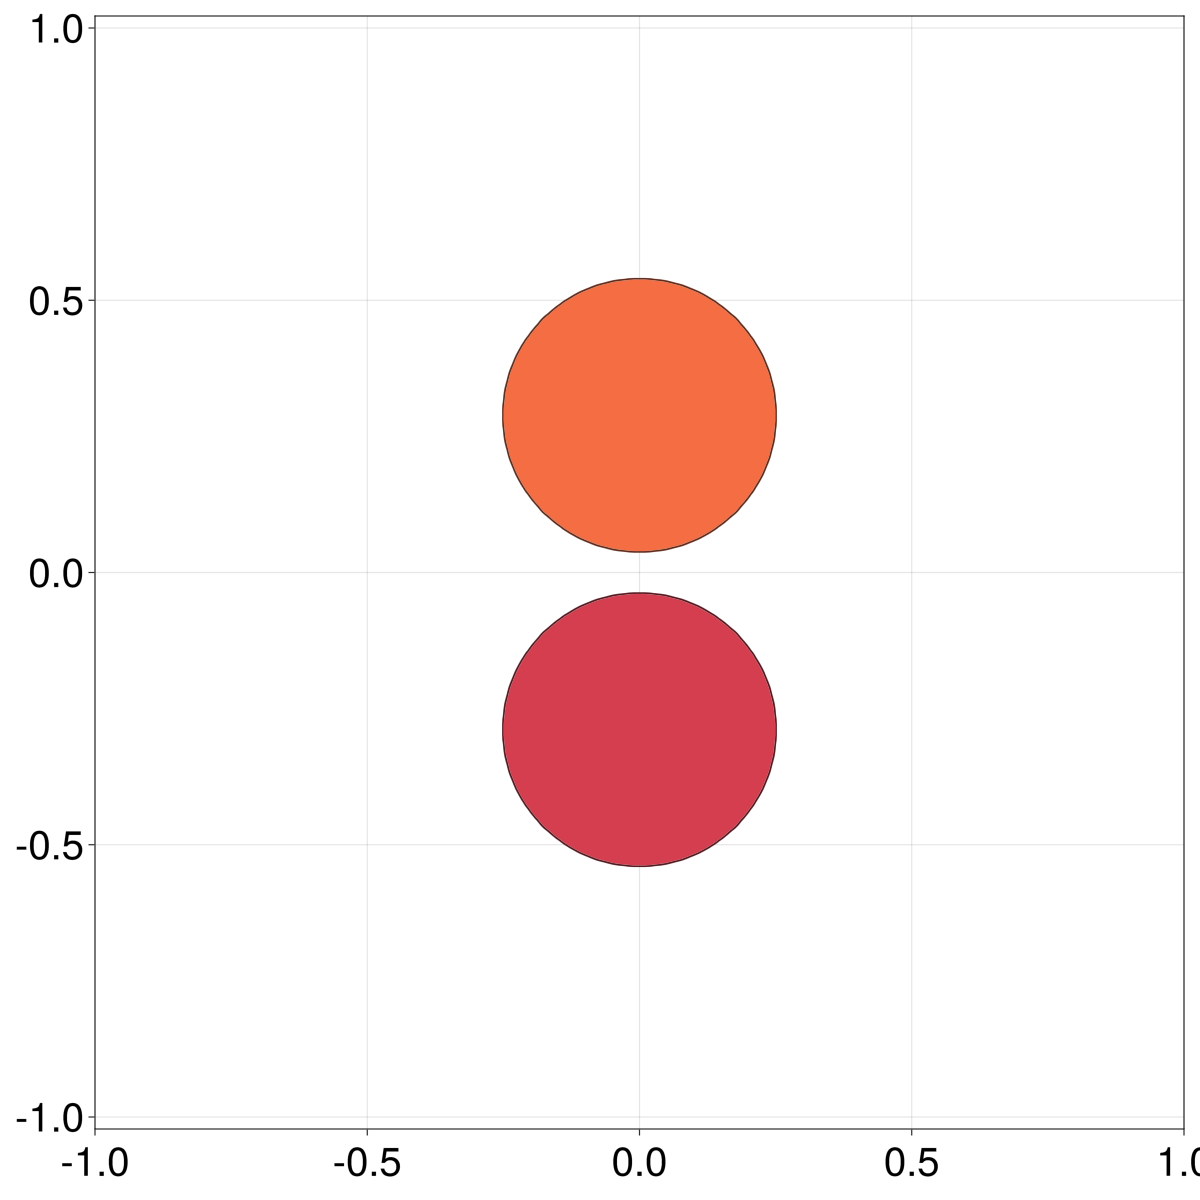
</div>

#### Periodic lattices

In [ ]:
#lattice(sublats, bravais)

In [8]:
lat0 = lattice(sublat((0.0, -0.5/sqrt(3.0)), name = :A),
            sublat((0.0,  0.5/sqrt(3.0)), name = :B));

In [16]:
lat = lattice(lat0; 
    bravais = SA[cos(pi/3) sin(pi/3); -cos(pi/3) sin(pi/3)]')

Lattice{Float64,2,2} : 2D lattice in 2D space
  Bravais vectors : [[0.5, 0.866025], [-0.5, 0.866025]]
  Sublattices     : 2
    Names         : (:A, :B)
    Sites         : (1, 1) --> 2 total per unit cell

In [5]:
#qplot(lat, siteradius = 0.1)

<div>
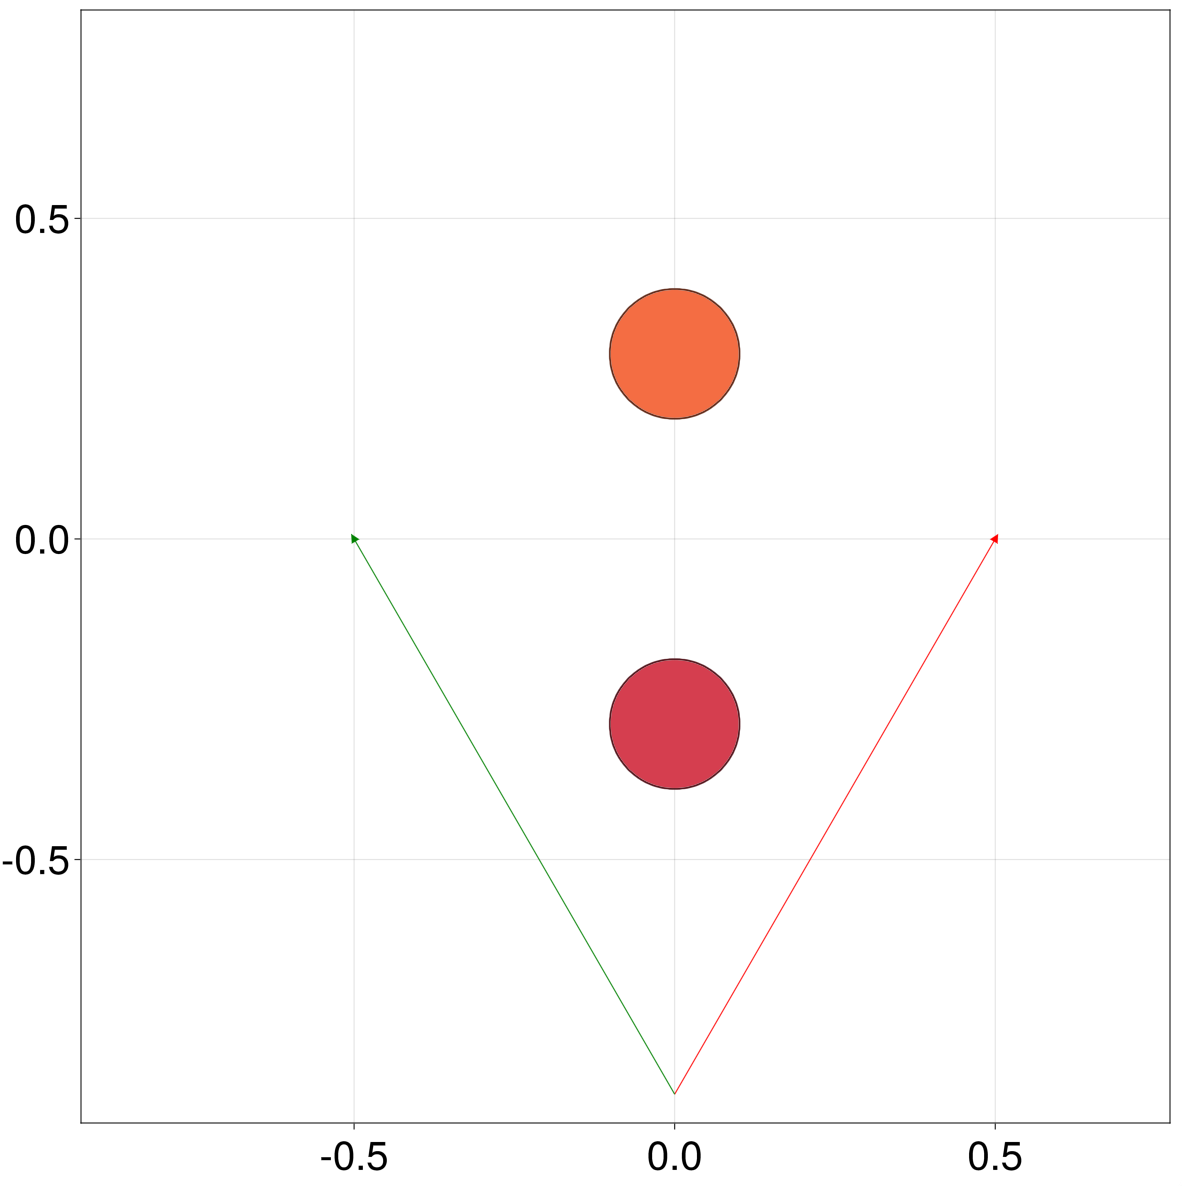
</div>

In [ ]:
LatticePresets.

In [12]:
lat0 = LatticePresets.honeycomb(a0 = 1);

##### Supercells out of an unitcell

In [11]:
lat = lat0 |> supercell(9);

In [ ]:
qplot(lat, siteradius = 0.1)

<div>
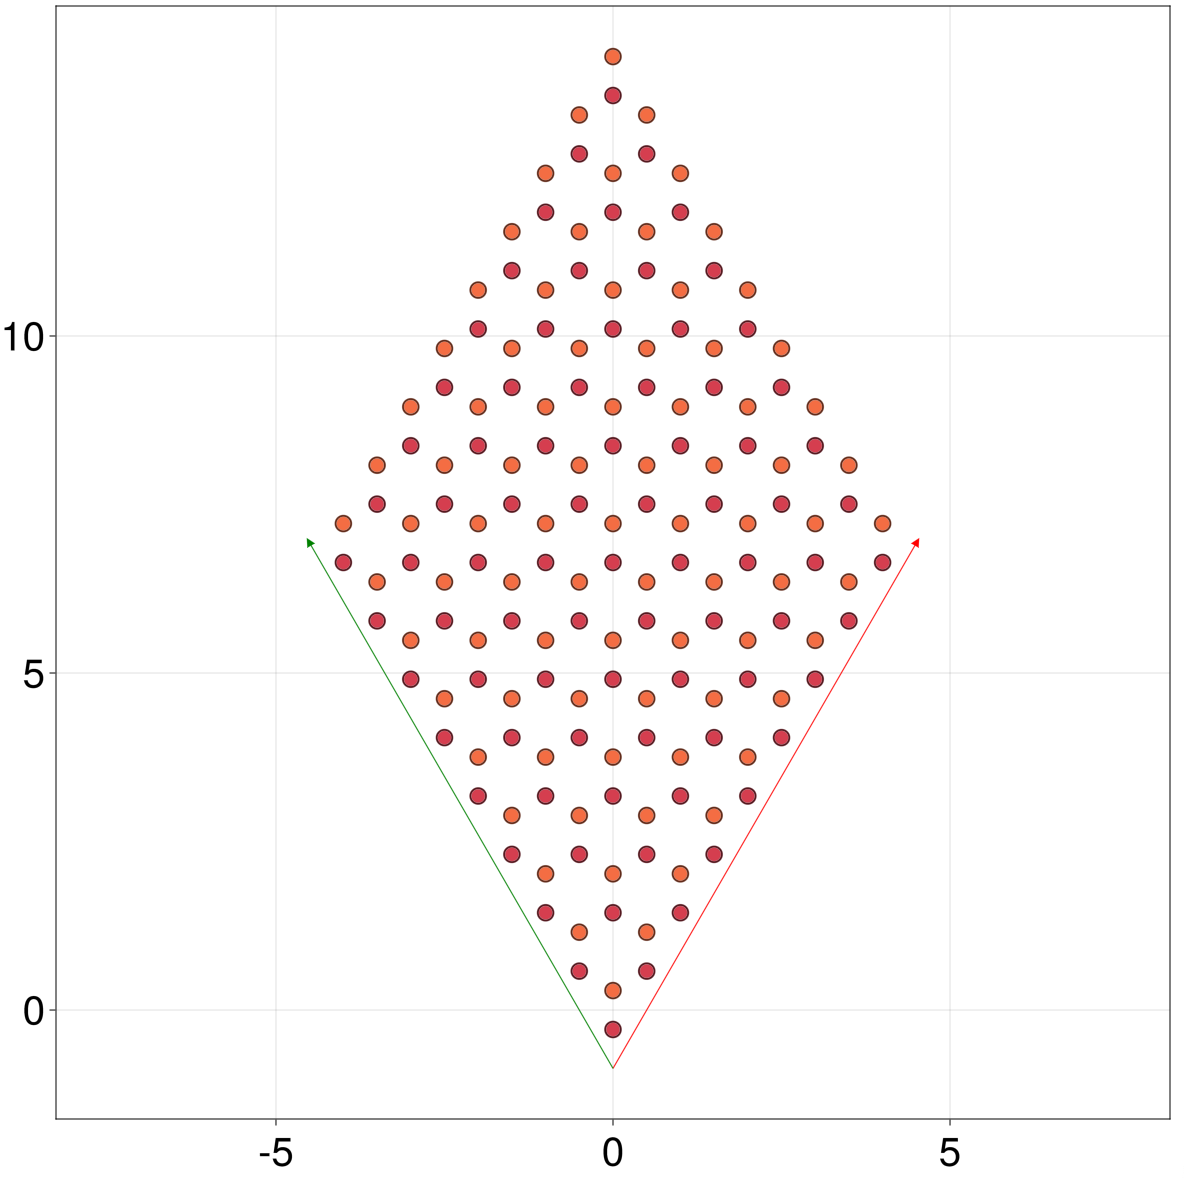
</div>

In [ ]:
# 1D 2D and 3D
qplot(LP.hcp(; a0 = 1)|> supercell(5))

<div>
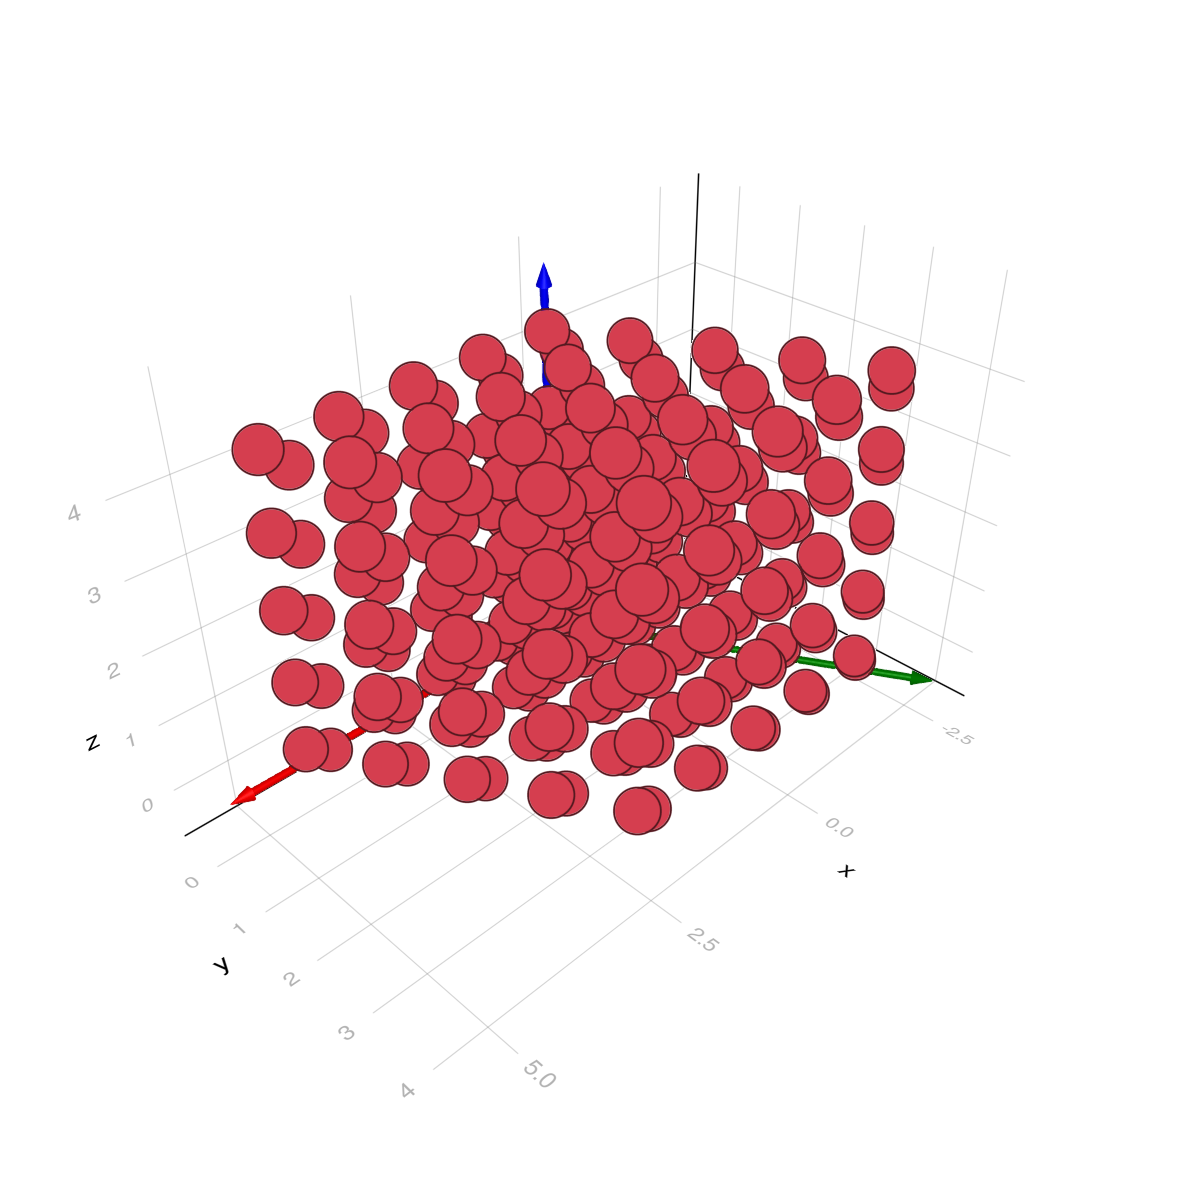
</div>

### Periodic system along one axis

In [17]:
lat0;

In [ ]:
qplot(lat0, siteradius = 0.1)

In [22]:
rot_lat = lat0 |> supercell((1, -1), (1, 1))

Lattice{Float64,2,2} : 2D lattice in 2D space
  Bravais vectors : [[1.0, 0.0], [0.0, 1.732051]]
  Sublattices     : 2
    Names         : (:A, :B)
    Sites         : (2, 2) --> 4 total per unit cell

In [ ]:
#qplot(rot_lat, siteradius = 0.1);

<div>
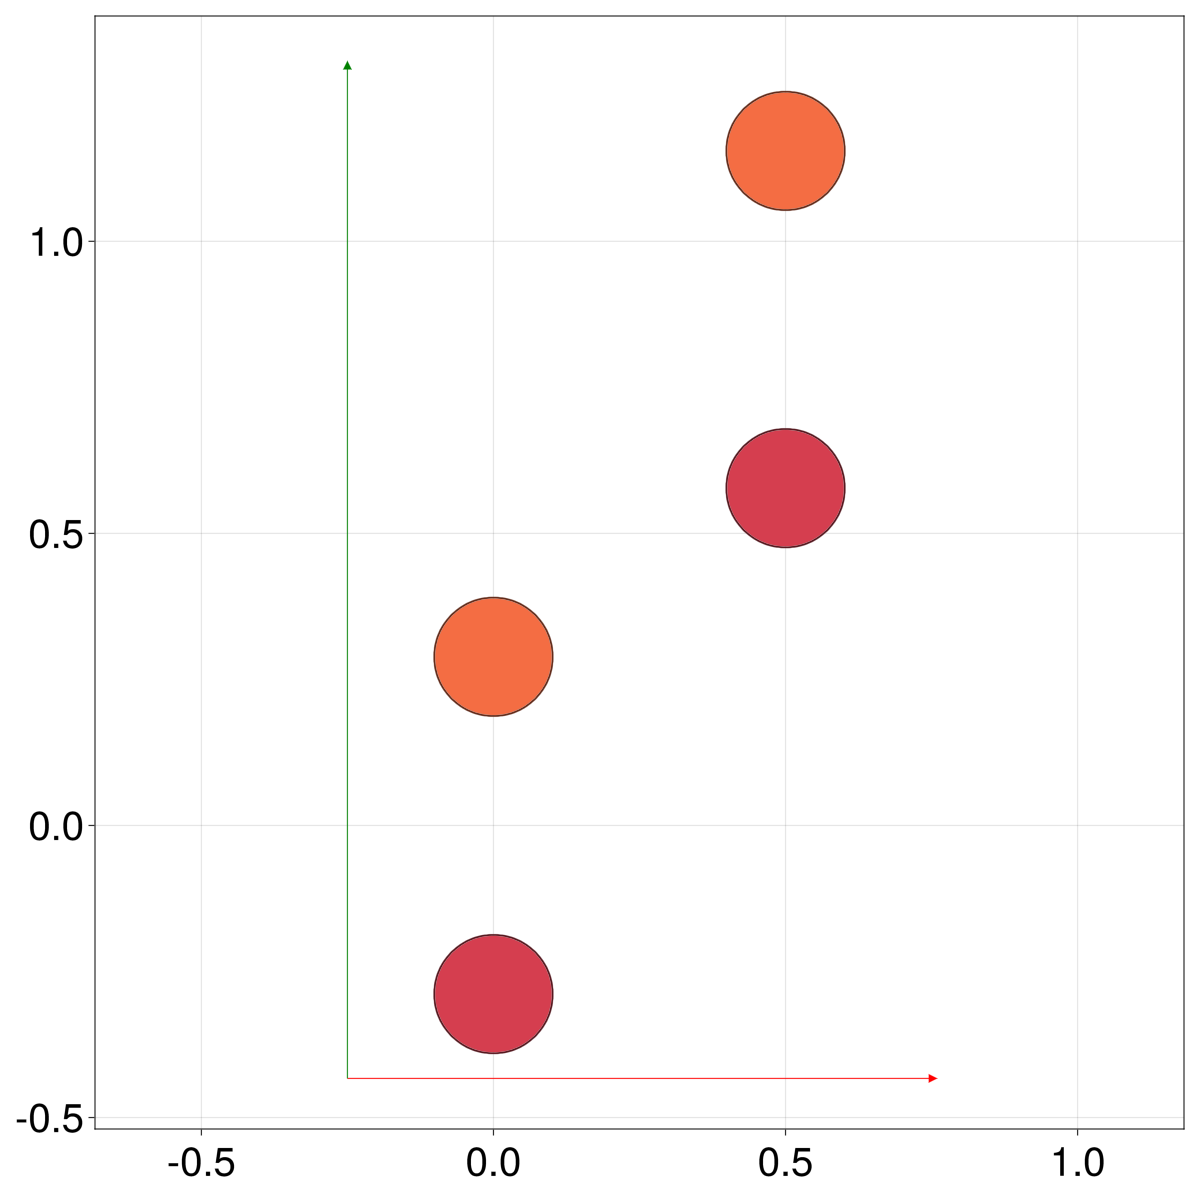
</div>

In [26]:
# Define a rotation axis
axis = (0,1);
perpaxis = 
    Quantica.normalize(
        Quantica.bravais(lat0).matrix * 
        SA[1 1; -1 1] * SA[-axis[2], axis[1]])

2-element Vector{Float64}:
 -1.0
  0.0

In [27]:
 arm_lat = rot_lat |> supercell((0,1), 
        region = r -> abs(dot((-1,0), r)) < 10)

Lattice{Float64,2,1} : 1D lattice in 2D space
  Bravais vectors : [[0.0, 1.732051]]
  Sublattices     : 2
    Names         : (:A, :B)
    Sites         : (39, 39) --> 78 total per unit cell

In [ ]:
#qplot(arm_lat, siteradius = 0.03)

<div>
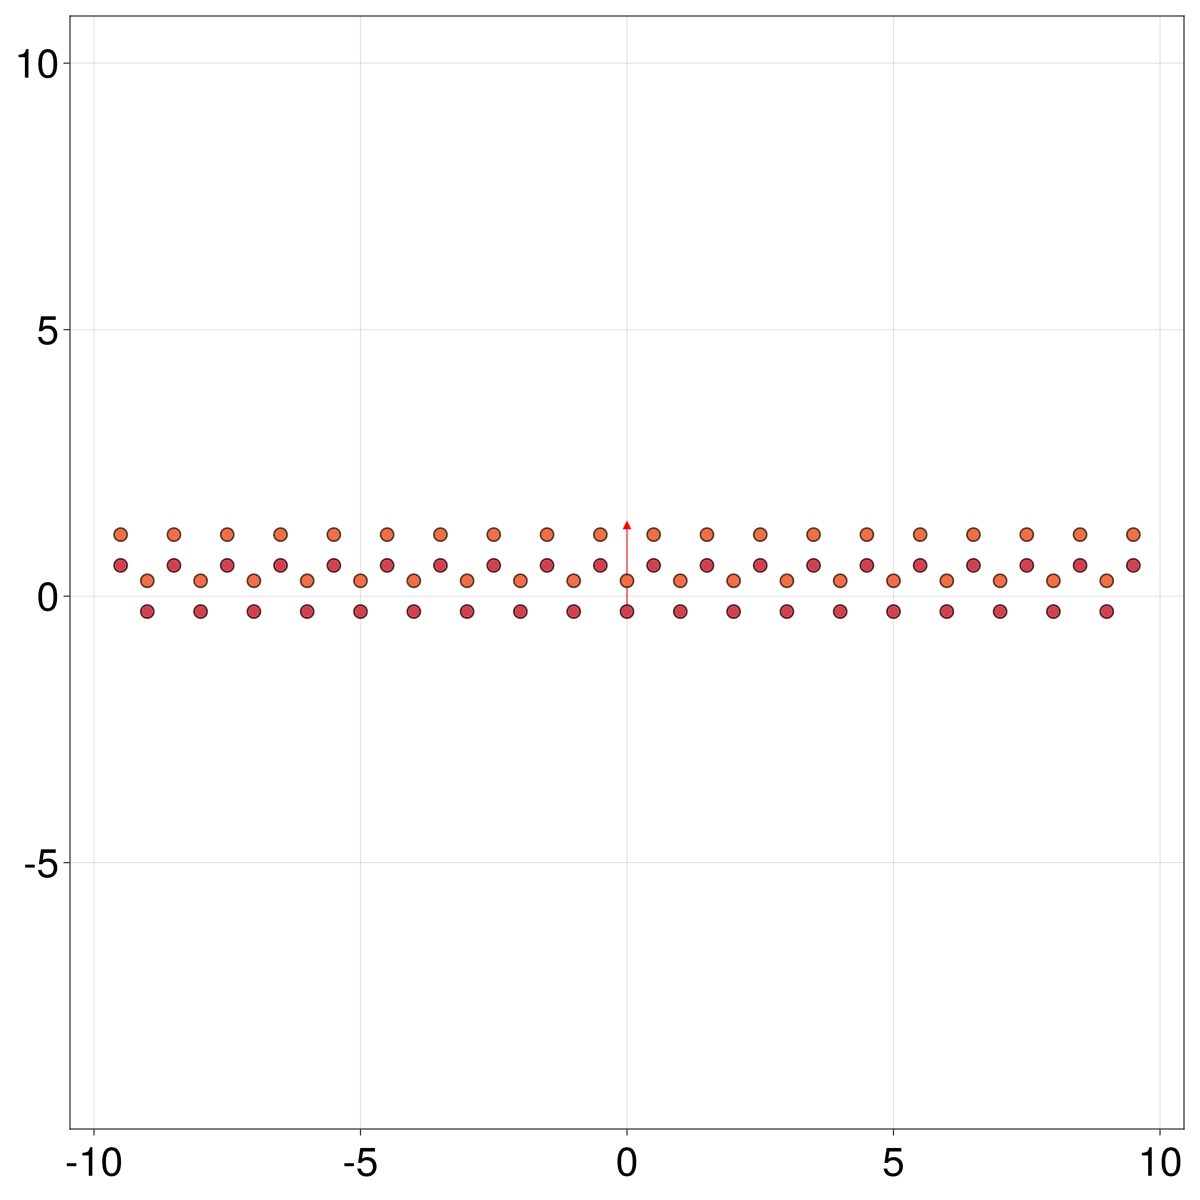
</div>

In [30]:
zz_lat = rot_lat |> supercell((1,0),
        region = r -> abs(dot((0,1), r)) < 10)

Lattice{Float64,2,1} : 1D lattice in 2D space
  Bravais vectors : [[1.0, 0.0]]
  Sublattices     : 2
    Names         : (:A, :B)
    Sites         : (23, 23) --> 46 total per unit cell

In [ ]:
#qplot(zz_lat, siteradius = 0.03)

<div>
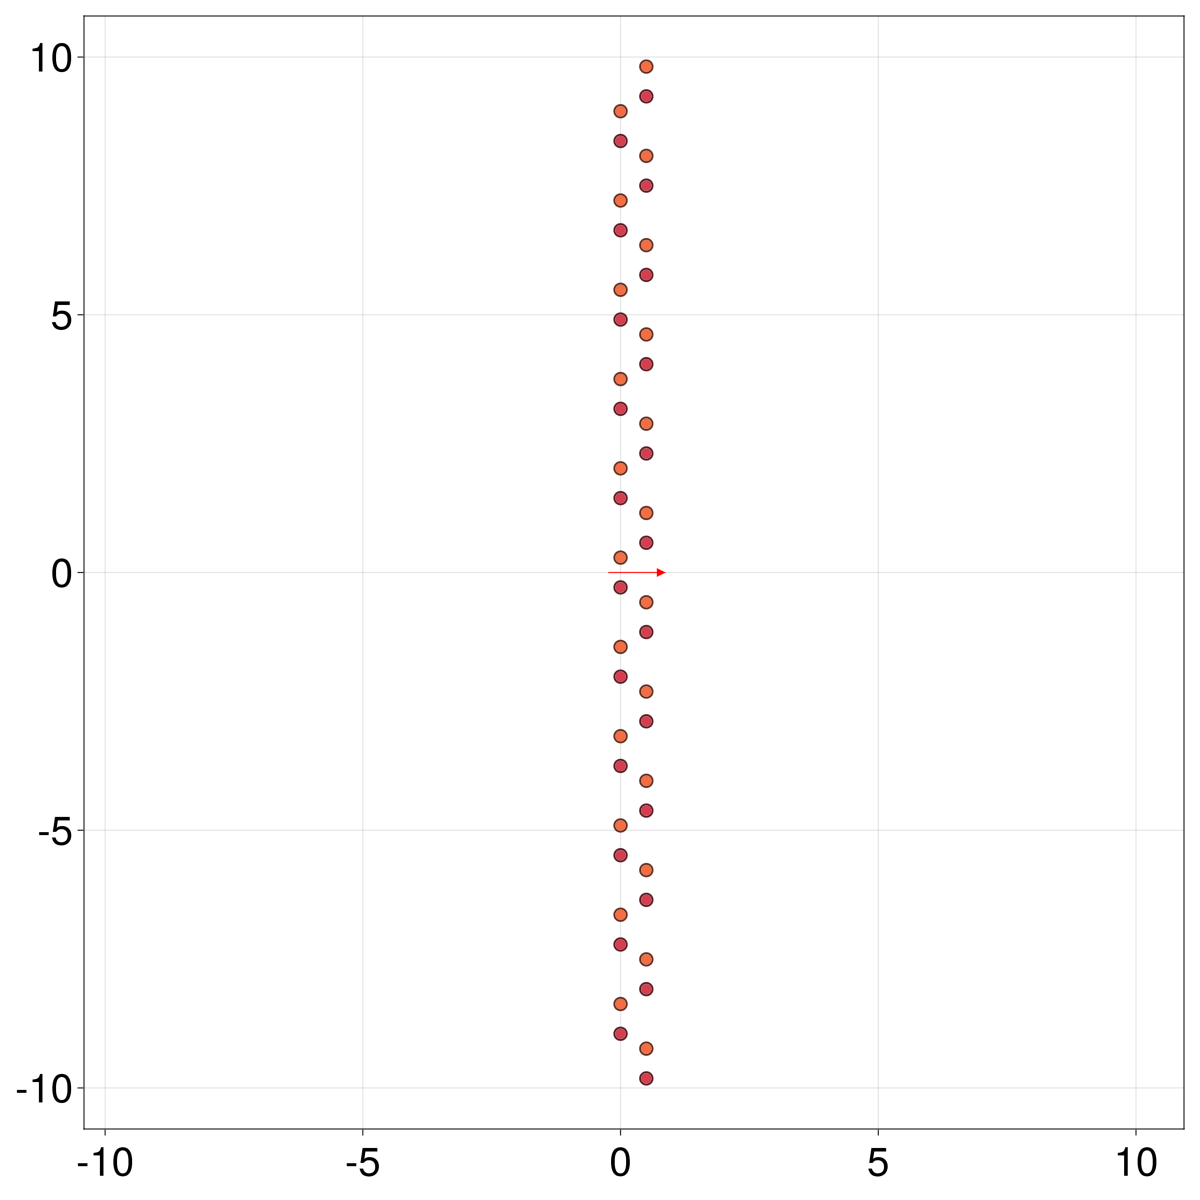
</div>

### Bounded Lattices

In [32]:
#missing bravais makes the system bounded
lat = lat0 |> supercell(; region = r -> norm(r) < 30)

Lattice{Float64,2,0} : 0D lattice in 2D space
  Bravais vectors : []
  Sublattices     : 2
    Names         : (:A, :B)
    Sites         : (3261, 3261) --> 6522 total per unit cell

In [ ]:
qplot(lat, siteradius = 0.1)

<div>
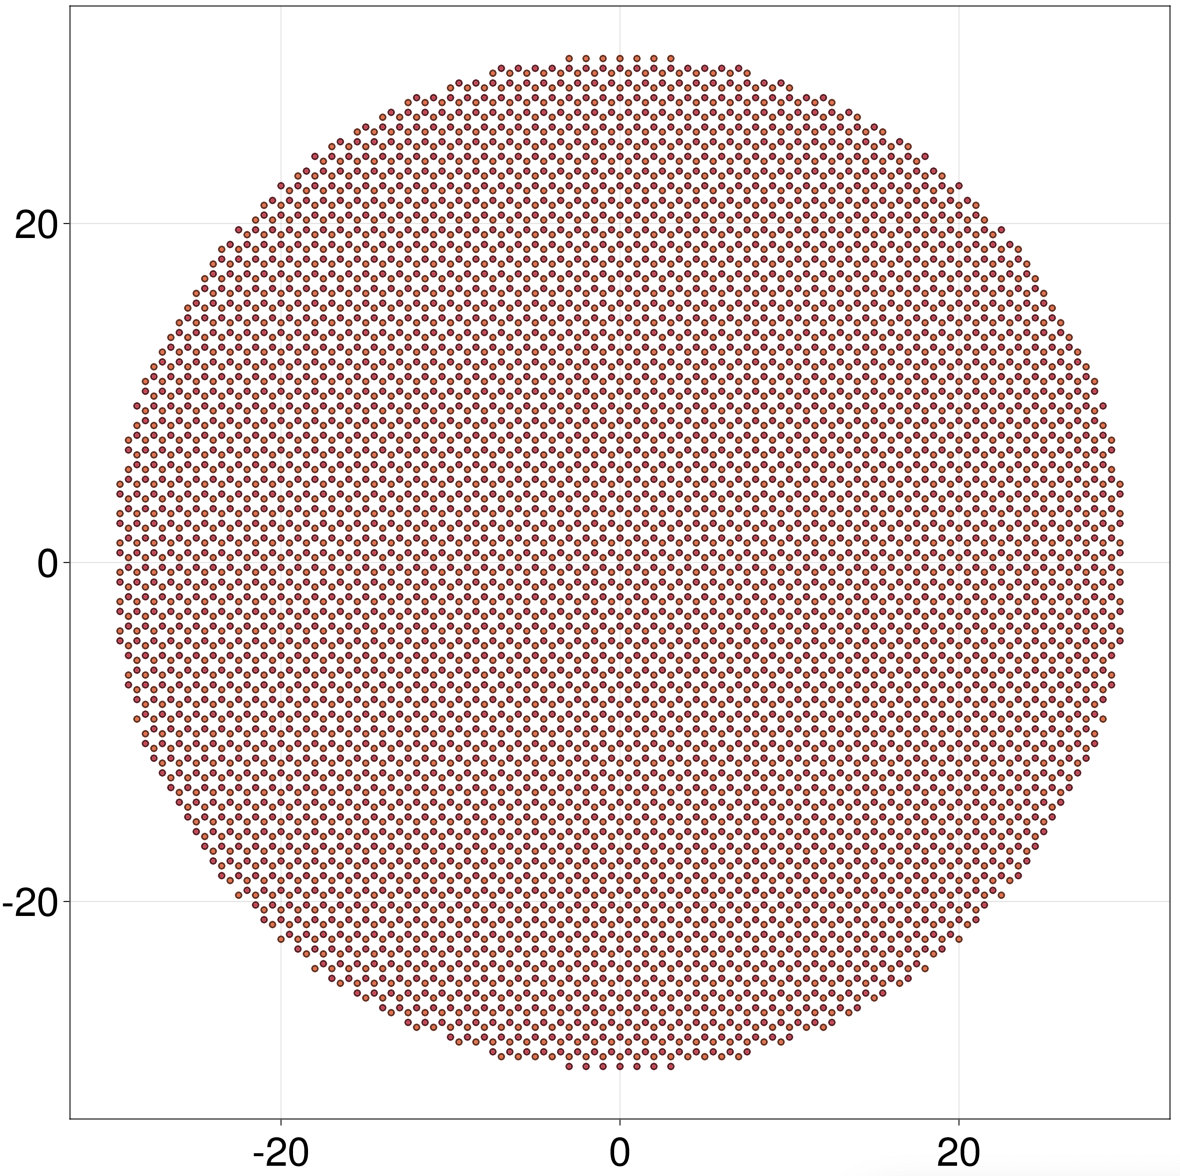
</div>

In [34]:
circular_with_a_hole(r) = (2<norm(r)< 4);
lat = lat0 |> supercell(;region = r -> circular_with_a_hole(r))

Lattice{Float64,2,0} : 0D lattice in 2D space
  Bravais vectors : []
  Sublattices     : 2
    Names         : (:A, :B)
    Sites         : (43, 43) --> 86 total per unit cell

In [ ]:
#qplot(lat, siteradius = 0.1)

<div>
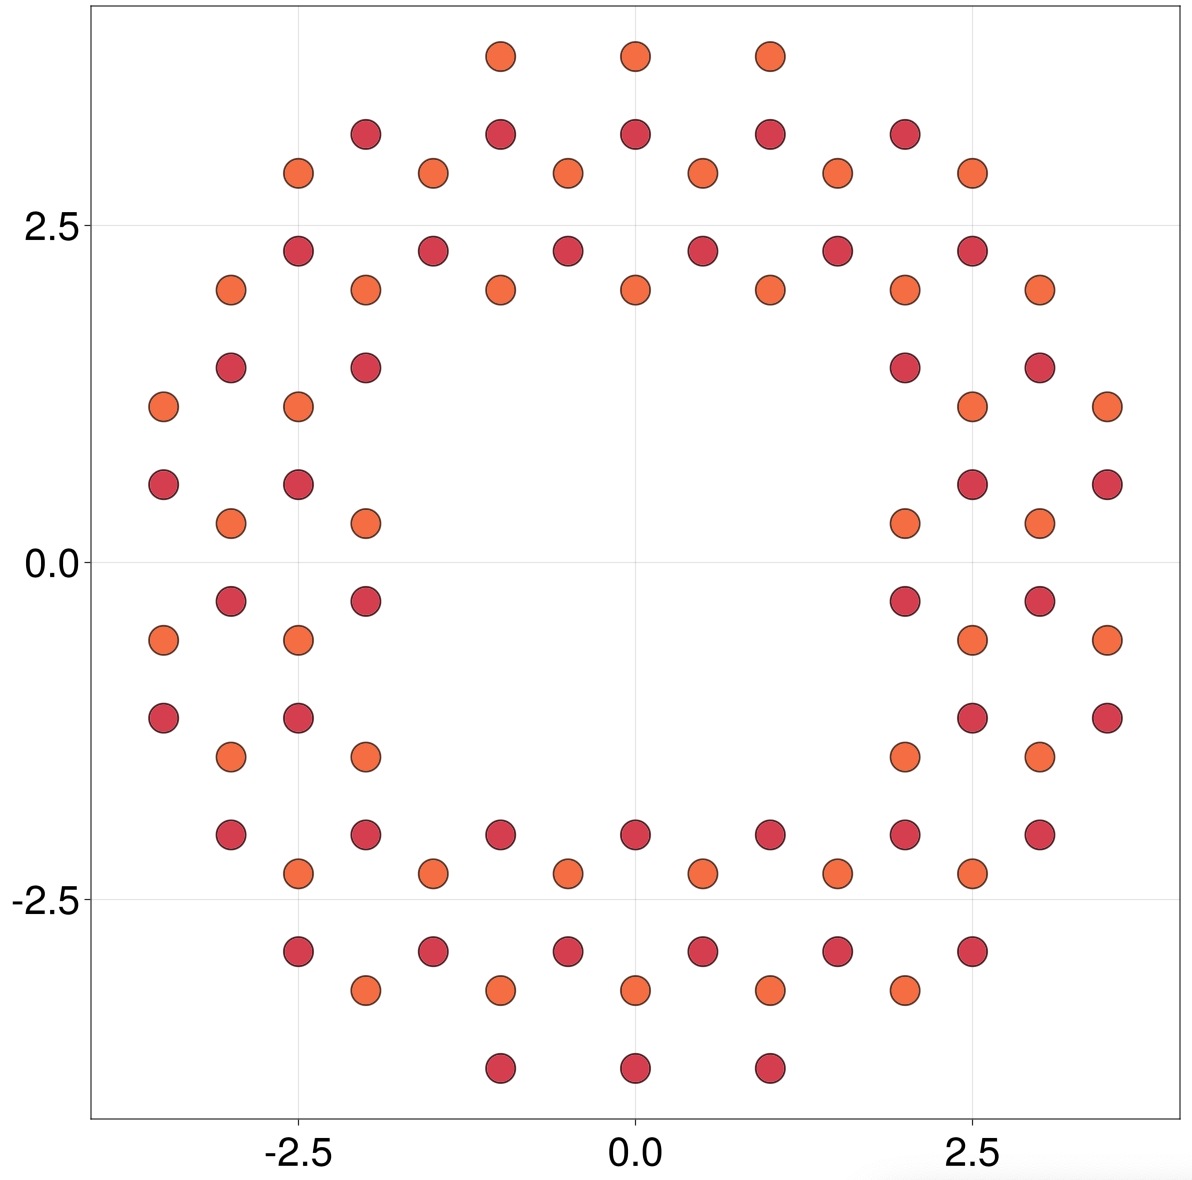
</div>

#### A summary: ZZ nanoribbon of bilayer graphene in Bernal stacking

In [36]:
function latBLG_unbounded(a0 = 1)
    dinter =  1.36 * a0
    sAbot = sublat((0.0,-1.0a0/sqrt(3.0), - dinter/2); name = :Ab)
    sBbot = sublat((0.0, 0.0a0/sqrt(3.0), - dinter/2); name = :Bb)
    sAtop = sublat((0.0, 0.0a0/sqrt(3.0), + dinter/2); name = :At)
    sBtop = sublat((0.0, 1.0a0/sqrt(3.0), + dinter/2); name = :Bt)
    br = a0 * SA[cos(pi/3) sin(pi/3) 0; -cos(pi/3) sin(pi/3) 0]'
    lat = lattice(sAtop, sBtop, sAbot, sBbot; bravais = br)
    return lat
end

latBLG_unbounded (generic function with 2 methods)

In [38]:
latBLG_unbounded() 

Lattice{Float64,3,2} : 2D lattice in 3D space
  Bravais vectors : [[0.5, 0.866025, 0.0], [-0.5, 0.866025, 0.0]]
  Sublattices     : 4
    Names         : (:At, :Bt, :Ab, :Bb)
    Sites         : (1, 1, 1, 1) --> 4 total per unit cell

In [25]:
zz_blg = latBLG_unbounded()  |> 
    supercell((1, -1), (1, 1)) |> 
    supercell((1,0), region = r -> abs(dot([0,1,1], r)) < 10)

Lattice{Float64,3,1} : 1D lattice in 3D space
  Bravais vectors : [[1.0, 0.0, 0.0]]
  Sublattices     : 4
    Names         : (:At, :Bt, :Ab, :Bb)
    Sites         : (23, 23, 23, 23) --> 92 total per unit cell

In [13]:
zz_blg = latBLG_unbounded() |> supercell((1, -1), (1, 1)) 
    |> supercell((1,0), region = r -> abs(dot([0,1,1], r)) < 10 && -2<abs(dot([1,0,1], r))<2)

Lattice{Float64,3,1} : 1D lattice in 3D space
  Bravais vectors : [[1.0, 0.0, 0.0]]
  Sublattices     : 4
    Names         : (:At, :Bt, :Ab, :Bb)
    Sites         : (23, 23, 23, 23) --> 92 total per unit cell

In [ ]:
zz_blg_bounded = zz_blg |> 
    supercell(region = r -> abs(dot([0,1,1], r)) < 10 && -2<abs(dot([1,0,1], r))<2)

<div>
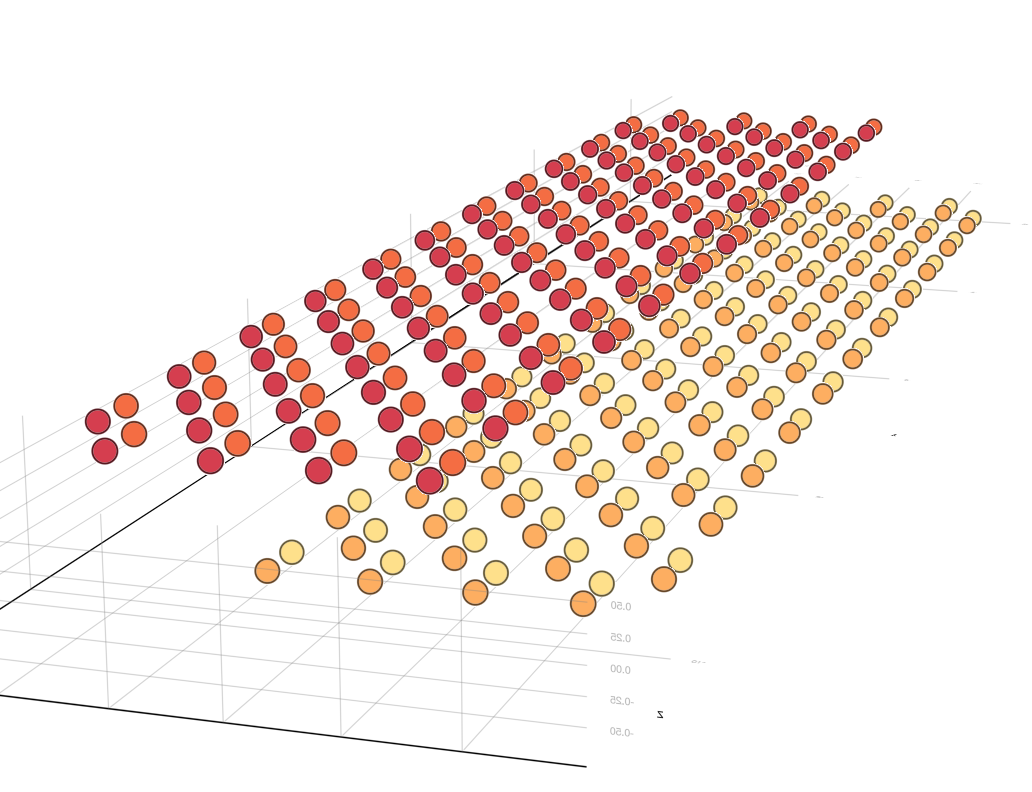
</div>

## 1B. The model 

Given a (un)bounded lattice we design a model for the onsite and hopping in the sites
`onsite()` `hopping()`

##### Spinless single orbital

In [42]:
a0 = 0.246
lat_graph = LP.honeycomb(; a0 = a0) |> supercell(3)# lattice
# some params
t0 = 2.7
V0 = 5
range = a0/sqrt(3) 
β = 3;

In [64]:
ons = onsite(V0; sublats = :A) + # staggered potential between A and B lattices
    onsite(-V0; sublats = :B) + 
    onsite((r) -> rand(1), sublats = (:A,:B)); # random non-magnetic disorder affecting both lattices

In [47]:
hops = hopping((r, dr) -> t0 * exp(-β*(norm(dr)/a0 - 1)) * I, range = range);

In [59]:
model = ons + hops;

In [58]:
ham = hamiltonian(lat_graph, model);

In [ ]:
qplot(ham, siteradius = 0.03, inspector = true)

<div>
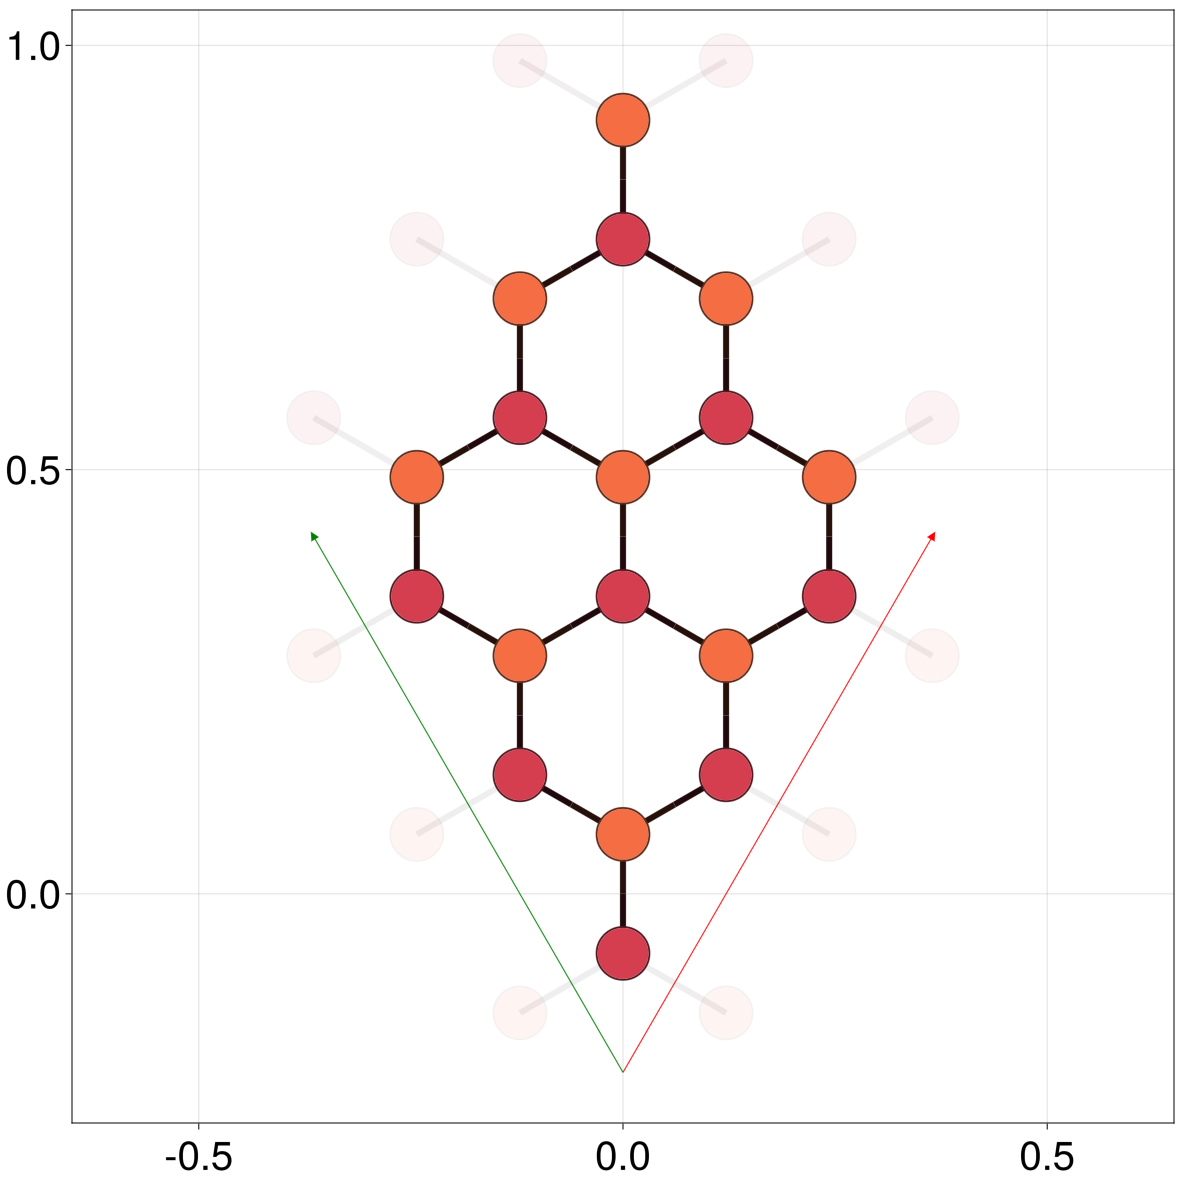
</div>

1. Multiorbital
2. Bogoliubov de Gennes systems
3. Peierls phases
4. ...

##### Parametric Hamiltonian and modifiers

## 1C. Worked out examples

### Magnetic systems: Peierls phases. Parametric Hamiltonians

In [74]:
model = hopping(1); peierls = @hopping!((t, r, dr; A = r -> SA[0,0]) -> t * cis(-dr' * A(r)));

In [75]:
h = LP.honeycomb() |> hamiltonian(model) |> supercell(10) |> hamiltonian(peierls);

<div>
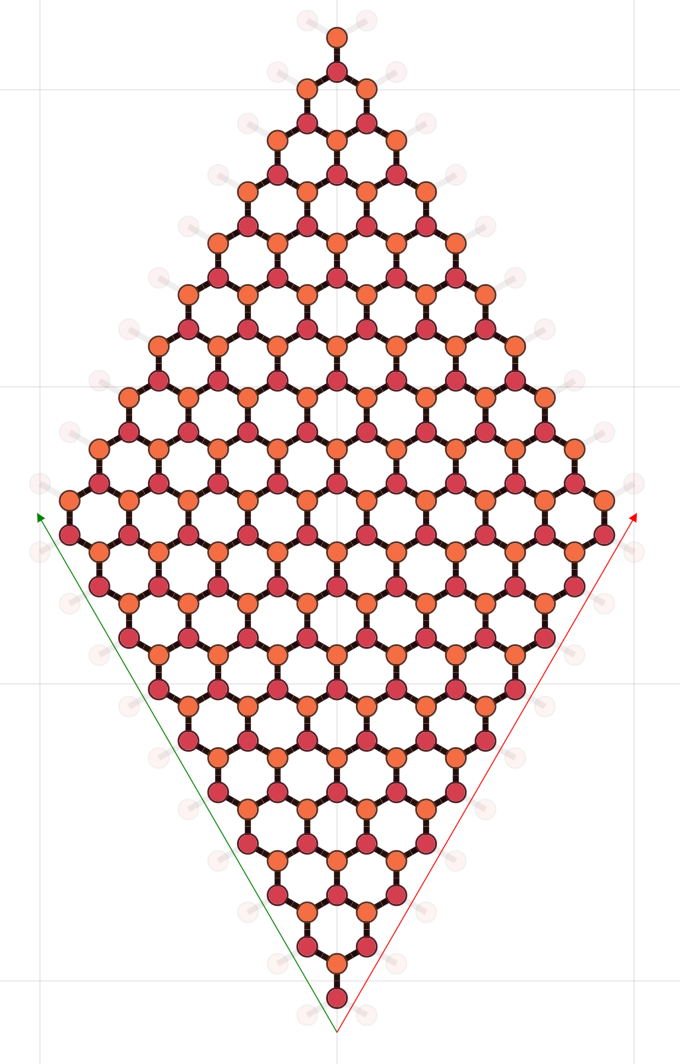
</div>

In [76]:
h(t = 2, A = Returns(SA[1,1]));

### The Kane-Mele model

In [92]:
SOC(dr) = ifelse(
            iseven(
                round(Int, atan(dr[2], dr[1])/(pi/3))), im, -im); 
# Kane-Mele spin-orbit coupling'

In [93]:
model = hopping(1, range = 1/√3) +
     @hopping((r, dr; α = 0) -> α * SOC(dr); 
    sublats = :A => :A, range = 1) - 
    @hopping((r, dr; α = 0) -> α * SOC(dr); sublats = :B => :B, range = 1);

In [94]:
h = LP.honeycomb(a0 = 1) |> hamiltonian(model);

In [73]:
#qplot(h(α = 0.02), inspector = true)

<div>
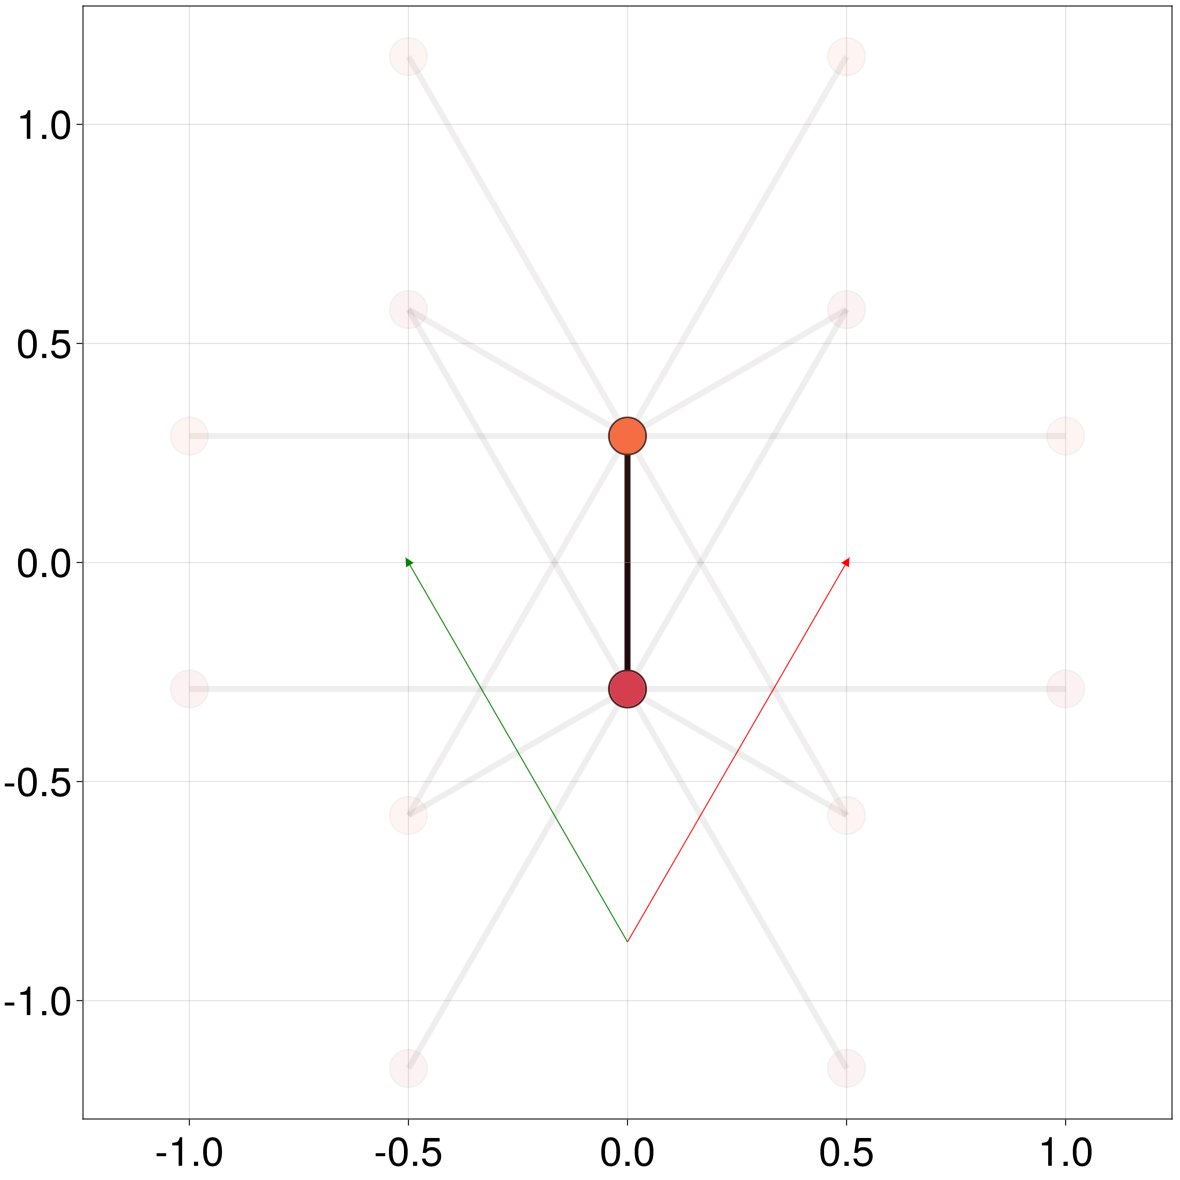
<div>

##### Bandstructure

`bands(h::Hamiltonian{...}, ...; kwargs...)`

In [ ]:
b = bands(h(α = 0.05), range(0, 2pi, length=60), range(0, 2pi, length = 60))

In [ ]:
#qplot(b, color = (psi, e, k) -> angle(psi[1] / psi[2]), colormap = :cyclic_mrybm_35_75_c68_n256)

<div>
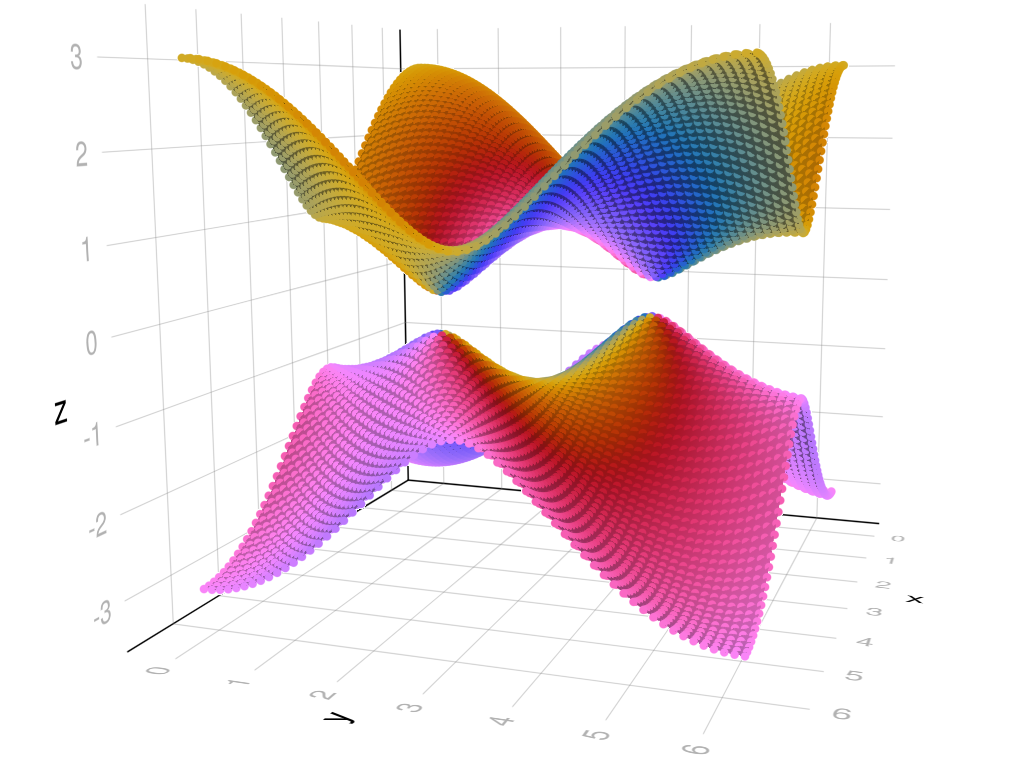
</div>

In [ ]:
#qplot(b, color = (psi, e, k) -> angle(psi[1] / psi[2]), colormap = :cyclic_mrybm_35_75_c68_n256, hide = :points)

In [97]:
b = bands(h(α = 0.0), polypath(0,4,101); mapping = (:M, :K, :M, :K´,:M));

In [98]:
#qplot(b, color = (psi, e, k) -> angle(psi[1] / psi[2]), hide = :points)

<div>
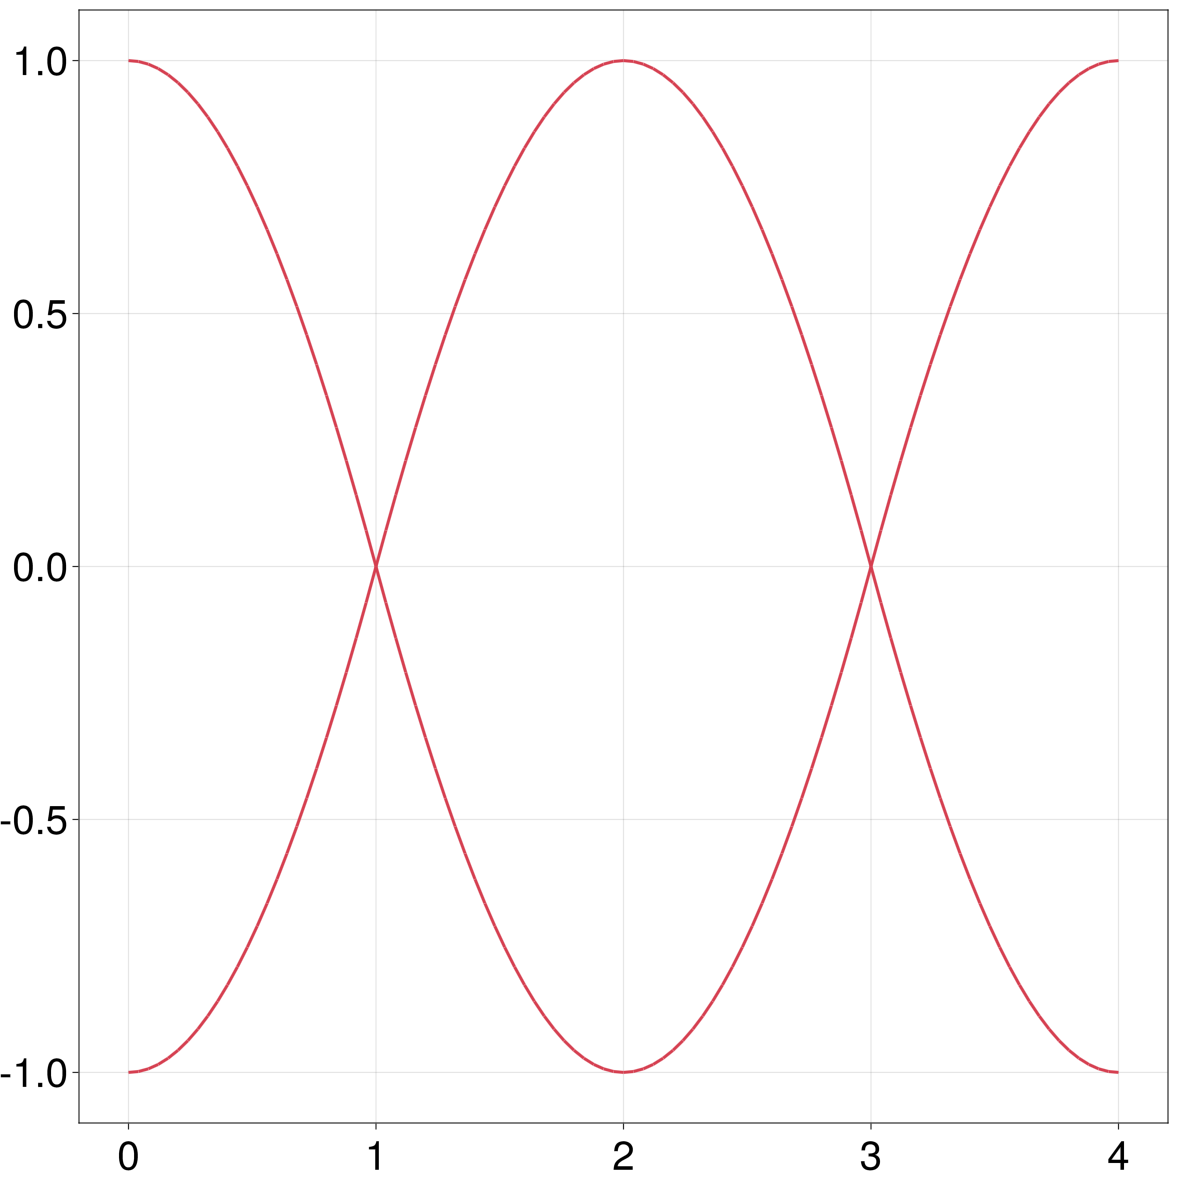
<div>

In [95]:
b = bands(h(α = 0.05), polypath(0,4,101); mapping = (:M, :K, :M, :K´,:M));

<div>
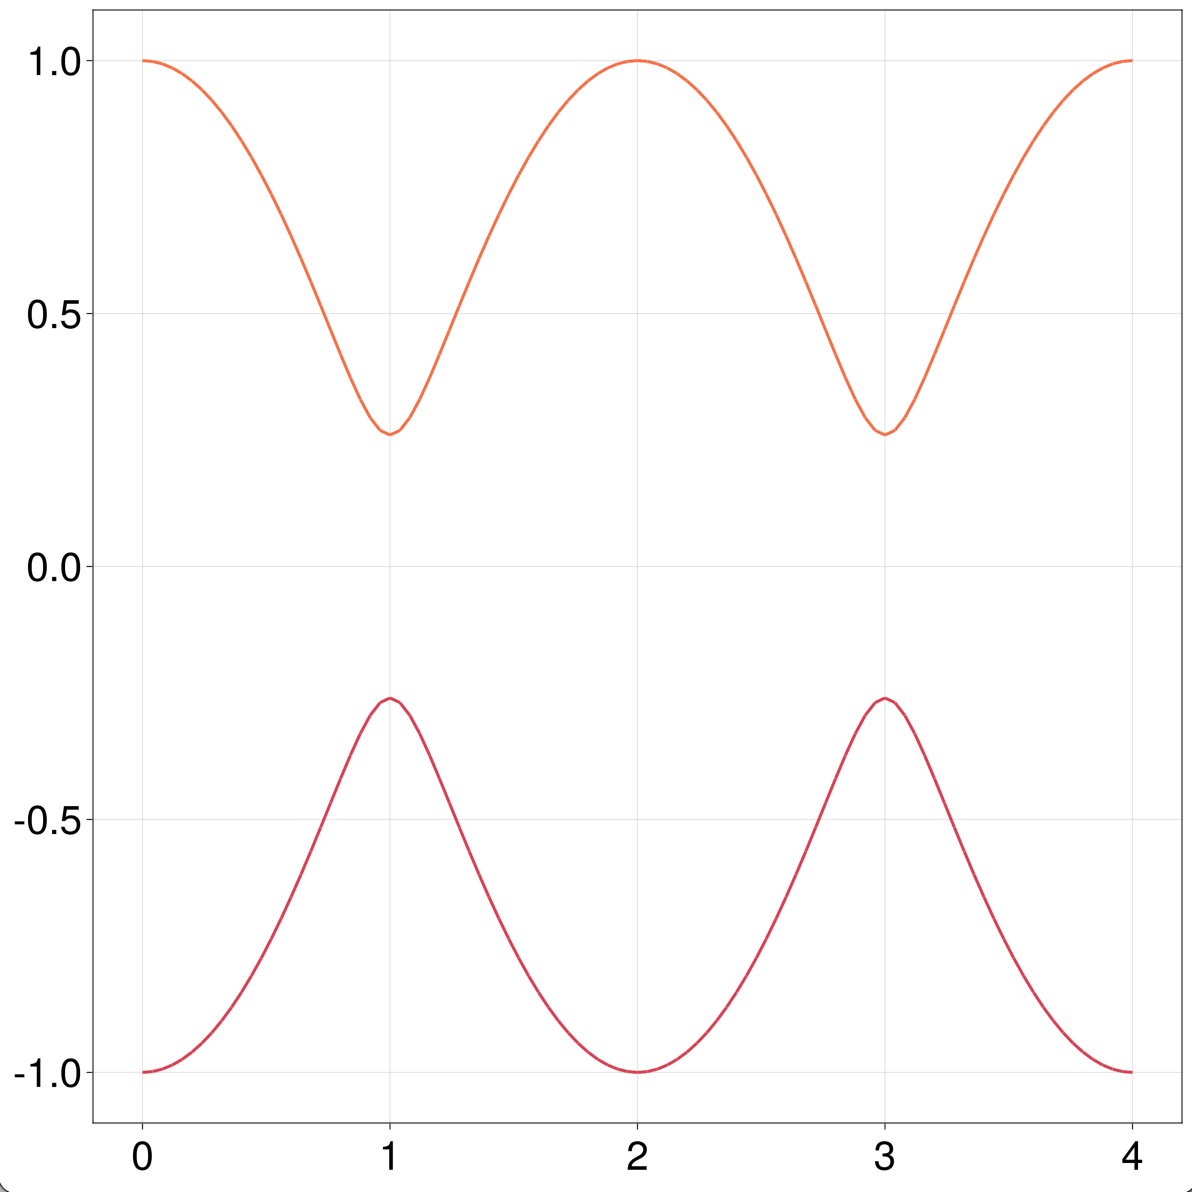
<div>

In [96]:
b.subbands

2-element Vector{Quantica.Subband{Float64, 2}}:
 Subband{Float64,2}: Subband over a 2-dimensional parameter space (like energy-momentum) of type Float64
  Mesh dim  : 1
  Space dim : 2
  Vertices  : 101
  Edges     : 100
  Simplices : 100
 Subband{Float64,2}: Subband over a 2-dimensional parameter space (like energy-momentum) of type Float64
  Mesh dim  : 1
  Space dim : 2
  Vertices  : 101
  Edges     : 100
  Simplices : 100

In [80]:
#qplot(b, color = (psi, e, k) -> angle(psi[1] / psi[2]), hide = :points)

### Spectrum

In [ ]:
h = HP.graphene() |> supercell(50) |> supercell()
es, phis = spectrum(h,  solver = EigenSolvers.LinearAlgebra());
hist(real.(es), bins = 2000)

<div>
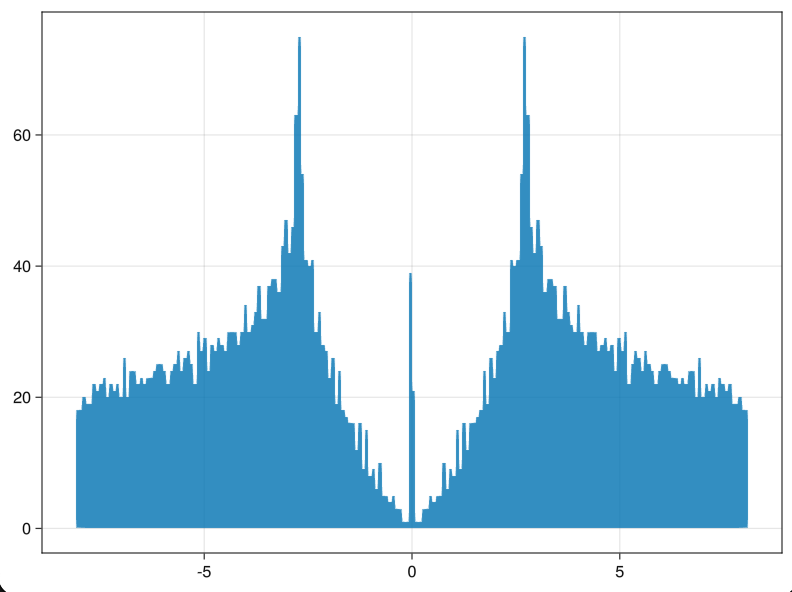
<div> 

### Transport in a Bogoliubov de Gennes system. A SNS junction

In [ ]:
const σz = SA[1 0; 0 -1]
const σx = SA[0 1; 1 0]
const L = 10
const W = 10

In [ ]:
#Here I build a BdG system consisting of two superconducting leads (S) and a normal (scattering) region (N)
# SNS junction
# Scattering or central region
h = LP.square() |> hamiltonian(hopping(σz), orbitals = 2) |> supercell(region = RP.rectangle((2L, 2W)))

In [ ]:
# Left and right leads
hl = LP.square() |> hamiltonian(hopping(σz) + onsite(0.1 * σx), orbitals = 2) |> supercell((-1,0), region = r -> -W <= r[2] <= W)
hr = LP.square() |> hamiltonian(hopping(σz) + onsite(0.1 * σx), orbitals = 2) |> supercell((1,0), region = r -> -W <= r[2] <= W)

In [ ]:
# Green's functions of the lattice
gl = hl |> greenfunction(GS.Schur(boundary = -L))
gr = hl |> greenfunction(GS.Schur(boundary = L))

In [ ]:
#Integrating out the leads
g = h |> attach(gl; region = r -> r[1] == -L) |> attach(gr; region = r -> r[1] == L) 

In [ ]:
# System's dressed GF
G = g |> greenfunction(GS.SparseLU())
# Plot
qplot(g, inspector = true)

<div>
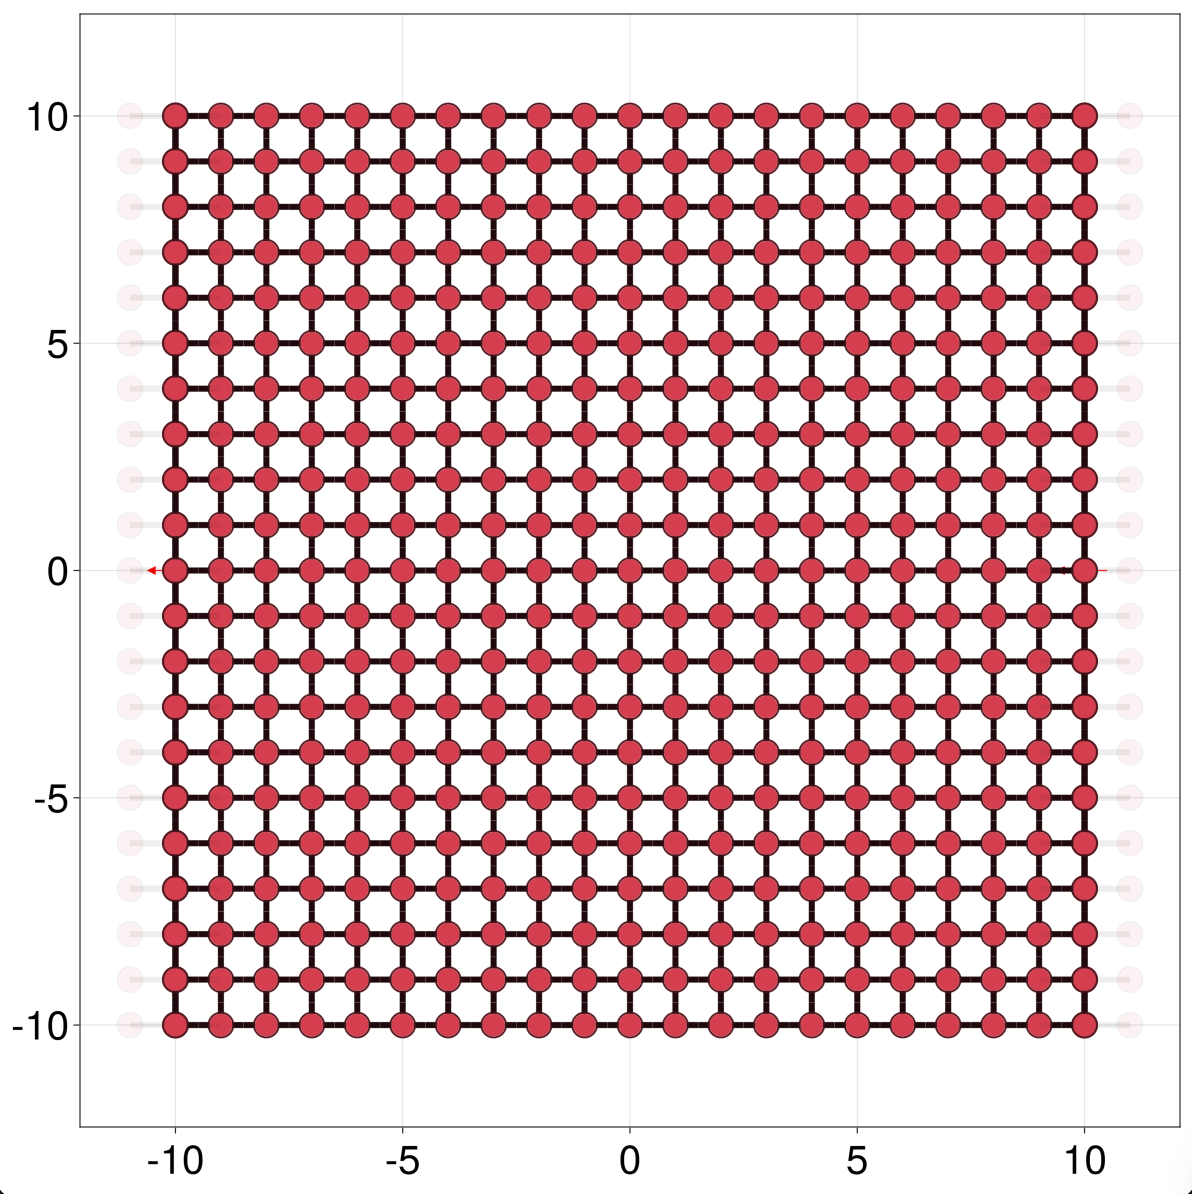
</div>

### Observables

In [ ]:
# Josephsons
j = josephson(g, 4.5; phases = 100)
@time jlist = j()
scatter(jlist, xlabel = "\phi", ylabel = "J_c(\phi)")

<div>
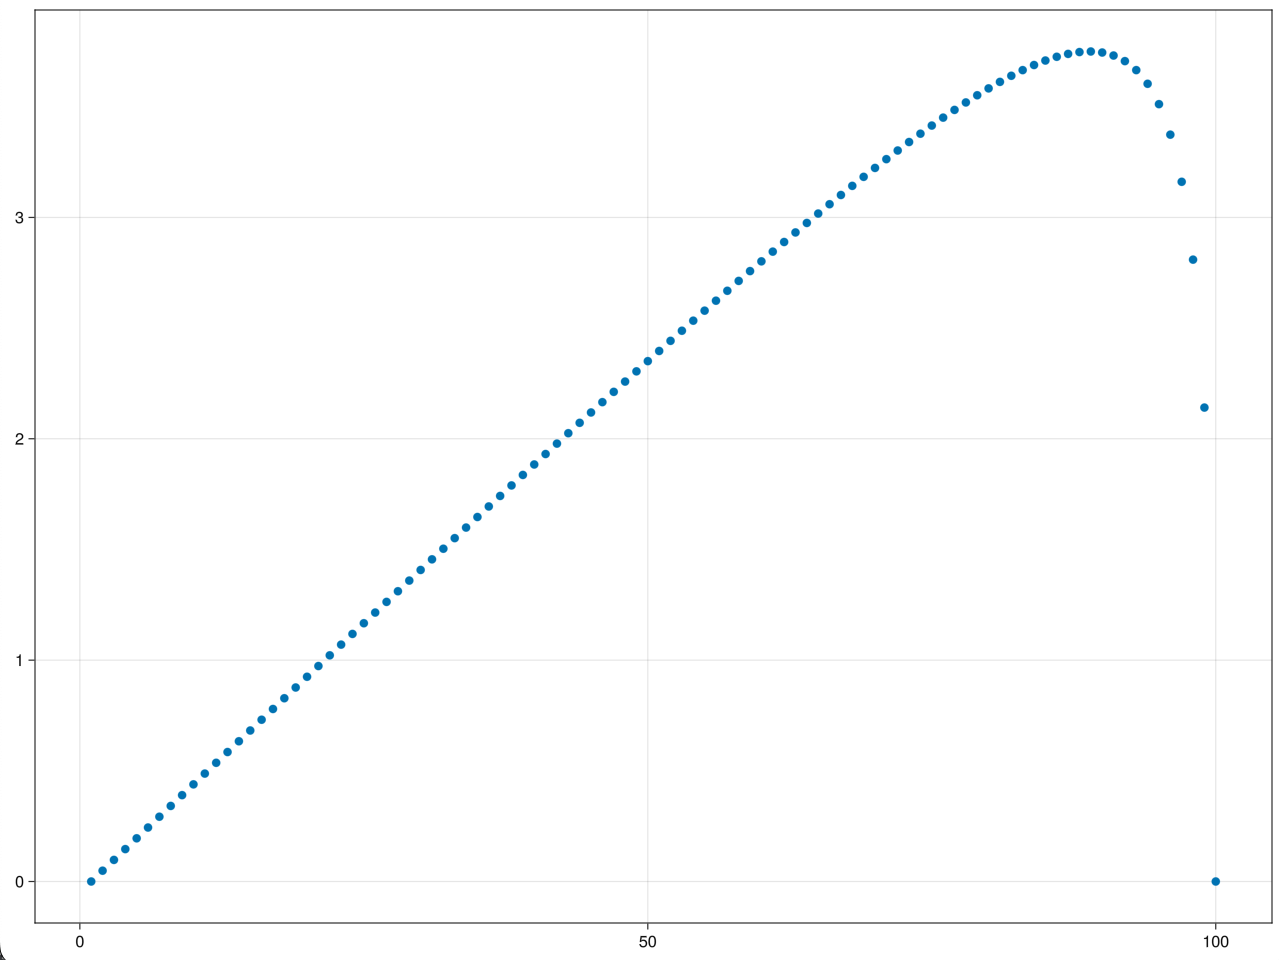
</div>

In [ ]:
# conductance(gs::GreenFunctionSlice; nambu -> false) -> G(ω; params...)::Real
#   For gs = g[i::Int, j::Int = i] -> we get zero temperature Gᵢⱼ = dIᵢ/dVⱼ in units of e^2/h
#   where i, j are contact indices
#       Gᵢⱼ =  e^2/h × Tr{[δᵢⱼi(Gʳ-Gᵃ)Γⁱ-GʳΓⁱGᵃΓʲ]}         (nambu = false)
#       Gᵢⱼ =  e^2/h × Tr{[δᵢⱼi(Gʳ-Gᵃ)Γⁱτₑ-GʳΓⁱτzGᵃΓʲτₑ]}   (nambu = true)
#   and where τₑ = [1 0; 0 0] and τz = [1 0; 0 -1] in Nambu space, and ω = eV.
#region

σ = conductance(g[i,j])


In [ ]:
############################################################################################
# ldos: local spectral density
#   d = ldos(::GreenSolution; kernel = I)      -> d[sites...]::Vector
#   d = ldos(::GreenFunctionSlice; kernel = I) -> d(ω; params...)::Vector
#   Here ldos is given as Tr(ρᵢᵢ * kernel) where ρᵢᵢ is the spectral function at site i
#region
### of a semi-infinite system (not necessarily bounded in all directions)
ldos(g[i,j], kwargs...)

In [ ]:
############################################################################################
# current: current density Jᵢⱼ(ω) as a function of a charge operator
#   d = current(::GreenSolution[, dir]; charge)      -> d[sites...]::SparseMatrixCSC{SVector{E,T}}
#   d = current(::GreenFunctionSlice[, dir]; charge) -> d(ω; params...)::SparseMatrixCSC{SVector{E,T}}
#   Computes the zero-temperature equilibrium current density matrix Jᵢⱼ from site j to site i
#       Jᵢⱼ(ω) = (2/h) rᵢⱼ Re Tr[(Hᵢⱼgʳⱼᵢ - gʳᵢⱼHⱼᵢ)Q]
#   Here charge = Q, where Q is usually qe*I for normal, and qe*τz/2 for Nambu systems
#   `dir` projects Jᵢⱼ along a certain direction, or takes the norm if missing
#   We use a default charge = -I, corresponding to normal currents densities in units of e/h
#region
current(g[i,j], kwargs...)

### Moiré system

In [1]:
function my_twisted_bilayer_graphene(;
    twistindex = 1, twistindices = (twistindex, 1), a0 = 0.246, interlayerdistance = 1.36a0,
    rangeintralayer = a0/sqrt(3), rangeinterlayer = 4a0/sqrt(3), hopintra = 2.70,
    hopinter = 0.48, modelintra = hopping(hopintra, range = rangeintralayer), kw...)

    # Sublattices
    (m, r) = twistindices
    θ = acos((3m^2 + 3m*r +r^2/2)/(3m^2 + 3m*r + r^2))
    sAbot = sublat((0.0, -0.5a0/sqrt(3.0), - interlayerdistance / 2); name = :Ab)
    sBbot = sublat((0.0,  0.5a0/sqrt(3.0), - interlayerdistance / 2); name = :Bb)
    sAtop = sublat((0.0, -0.5a0/sqrt(3.0),   interlayerdistance / 2); name = :At)
    sBtop = sublat((0.0,  0.5a0/sqrt(3.0),   interlayerdistance / 2); name = :Bt)
    brbot = a0 * SA[ cos(pi/3) sin(pi/3) 0; -cos(pi/3) sin(pi/3) 0]'
    brtop = a0 * SA[ cos(pi/3) sin(pi/3) 0; -cos(pi/3) sin(pi/3) 0]'
    # Supercell matrices sc.
    # The one here is a [1 0; -1 1] rotation of the one in Phys. Rev. B 86, 155449 (2012)
    if gcd(r, 3) == 1
        scbot = SA[m -(m+r); (m+r) 2m+r] * SA[1 0; -1 1]
        sctop = SA[m+r -m; m 2m+r] * SA[1 0; -1 1]
    else
        scbot = SA[m+r÷3 -r÷3; r÷3 m+2r÷3] * SA[1 0; -1 1]
        sctop = SA[m+2r÷3 r÷3; -r÷3 m+r÷3] * SA[1 0; -1 1]
    end
    latbot = lattice(sAbot, sBbot; bravais = brbot)
    lattop = lattice(sAtop, sBtop; bravais = brtop)
    
    # Atomistic Hamiltonian of BLG
    htop = hamiltonian(lattop, modelintra; ) |> supercell(sctop)
    hbot = hamiltonian(latbot, modelintra; ) |> supercell(scbot)
    let R = SA[cos(θ/2) -sin(θ/2) 0; sin(θ/2) cos(θ/2) 0; 0 0 1]
        Quantica.transform!(htop, r -> R * r)
    end
    let R = SA[cos(θ/2) sin(θ/2) 0; -sin(θ/2) cos(θ/2) 0; 0 0 1]
        Quantica.transform!(hbot, r -> R * r)
    end
    modelinter = hopping((r,dr) -> (
        hopintra * exp(-3*(norm(dr)/a0 - 1))  *  dot(dr, SVector(1,1,0))^2/sum(abs2, dr) -
        hopinter * exp(-3*(norm(dr)/a0 - interlayerdistance/a0)) * dr[3]^2/sum(abs2, dr)),
        range = rangeinterlayer)
    return combine(hbot, htop)#; coupling = modelinter)
end


my_twisted_bilayer_graphene (generic function with 1 method)

In [4]:
h = my_twisted_bilayer_graphene()

Hamiltonian{Float64,3,2}: Hamiltonian on a 2D Lattice in 3D space
  Bloch harmonics  : 9
  Harmonic size    : 28 × 28
  Orbitals         : [1, 1, 1, 1]
  Element type     : scalar (ComplexF64)
  Onsites          : 0
  Hoppings         : 804
  Coordination     : 28.71429

<div>
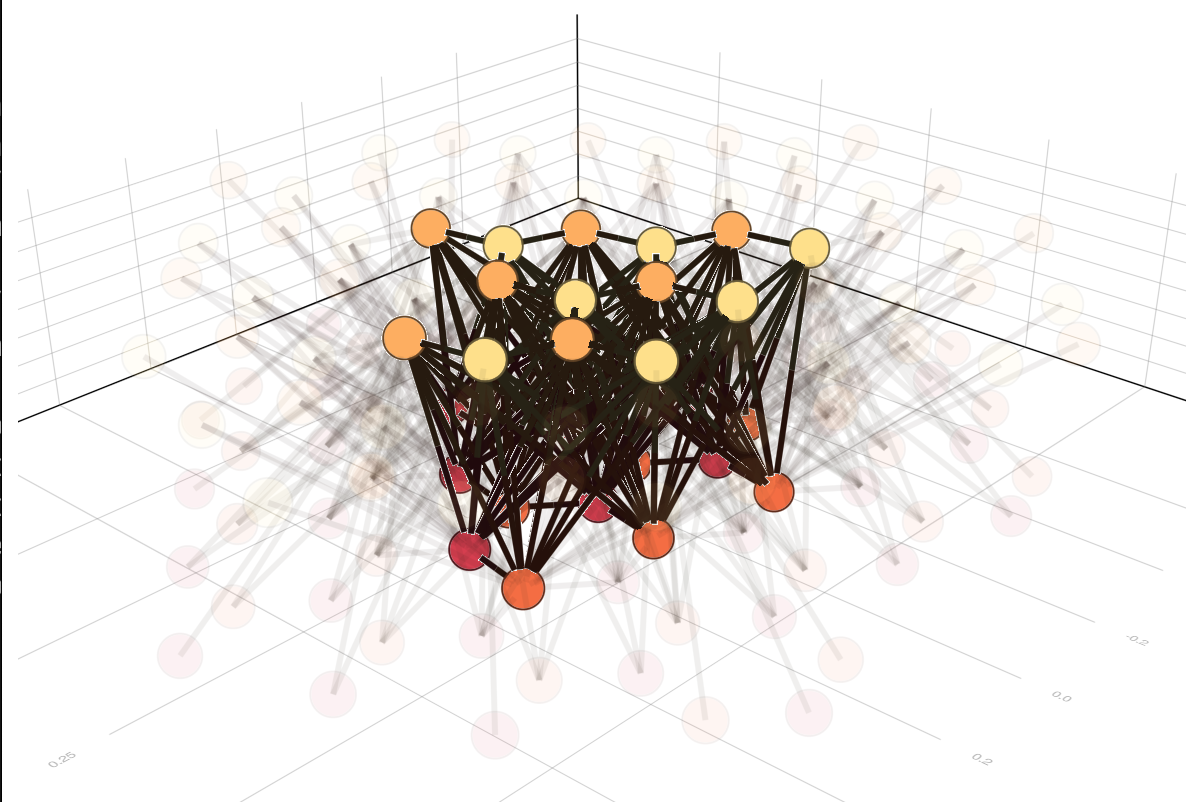
</div>

In [ ]:
b = bands(h, range(0, 2pi, length=60), range(0, 2pi, length = 60))

In [ ]:
qplot(b, color = (psi, e, k) -> angle(psi[1] / psi[2]), colormap = :cyclic_mrybm_35_75_c68_n256)

<div>
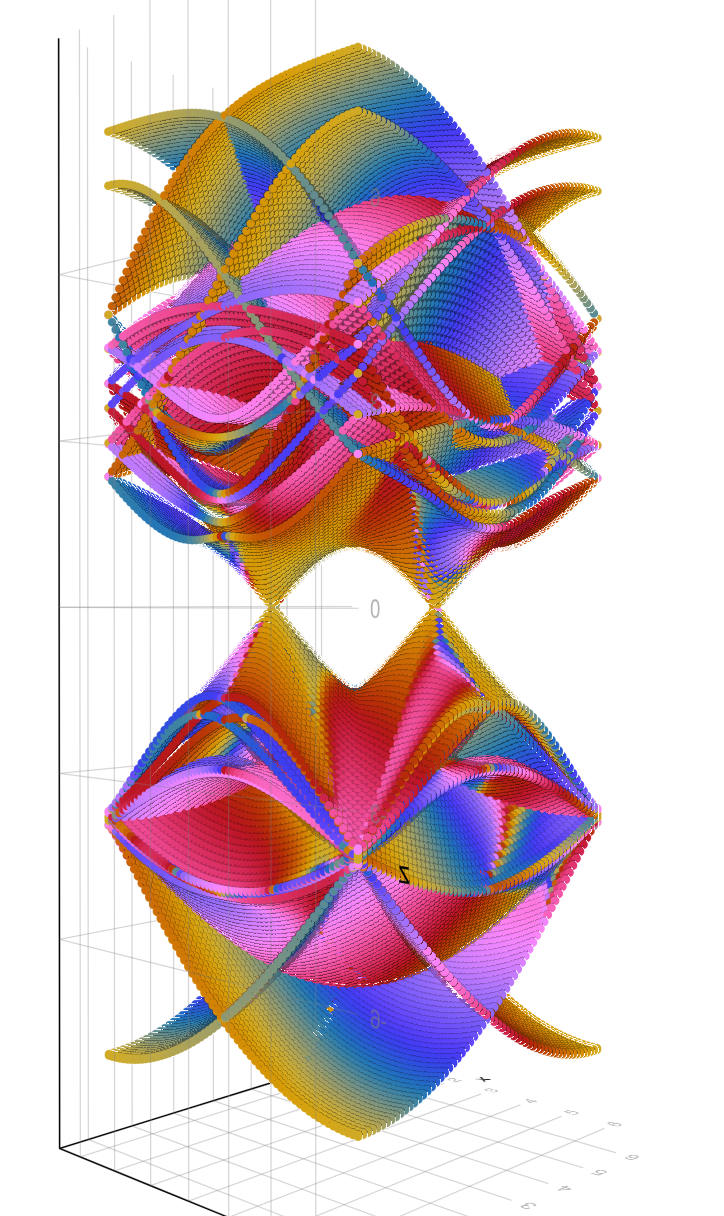
</div>

## KITE.jll

Further steps that extend Quantica.jl possibilities

linear and non_linear optical_conductivity elements of the conductivity tensor in in disordered and large moir'e (Wannier-inspired) TB systems

KPM routines (some already implemented in julia e.g. calculation of the spectrum of the bands for transport calculations)

ARPES calculations.


### Strategy


* Compute the hamiltonian using Quantica tools
* Optionally include instructions for periodic disorder
(which is efficiently stored in memory)
* Write a call to Kite.jll (as an extension)
* Compute the required quantities

## DMRG ITensor.jl

...